In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/rachelgrigiac/Documents/CareerFoundry/BIXI Project Analysis/02 Data'

In [5]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'bixitrips_weather_sample.csv'))

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
# Convert 'is_member' to numerical values (True -> 1, False -> 0)
df['is_member'] = df['is_member'].astype(int)

In [14]:
df['is_member'].value_counts()

is_member
1    4561753
0     956455
Name: count, dtype: int64

In [15]:
# Encoding 'season'
season_mapping = {'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3}
df['season_encoded'] = df['season'].map(season_mapping)

In [16]:
df['season_encoded'].value_counts()

season_encoded
1    2959057
2    1592411
0     966740
Name: count, dtype: int64

In [17]:
df['season'].value_counts()

season
Summer    2959057
Fall      1592411
Spring     966740
Name: count, dtype: int64

In [18]:
# Encoding "day_of_week"
day_of_week_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
df['day_of_week_encoded'] = df['day_of_week'].map(day_of_week_mapping)

In [19]:
df['day_of_week_encoded'].value_counts()

day_of_week_encoded
2    854532
3    848053
4    827915
1    817655
5    742238
0    736170
6    691645
Name: count, dtype: int64

In [20]:
df['day_of_week'].value_counts()

day_of_week
Wednesday    854532
Thursday     848053
Friday       827915
Tuesday      817655
Saturday     742238
Monday       736170
Sunday       691645
Name: count, dtype: int64

In [21]:
# Create a subset
df = df[['duration_sec','is_member','yearid','prectot','rh2m','t2m','t2m_max','t2m_min','t2m_range','ws10m','ws10m_min','ws10m_max','ws10m_range','month','distance','monthly_trip_count','season_encoded','day_of_week_encoded']]

In [22]:
# Elbow Technique
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [23]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 


score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-2.873093778737756e+17,
 -9.574645862022592e+16,
 -4.898354560565009e+16,
 -2.28784848979136e+16,
 -1.2301466176237046e+16,
 -7979413247421030.0,
 -5638905552023708.0,
 -3645334292298587.0,
 -2754258495798243.5]

In [24]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [25]:
# Fit the k-means object to the data.

kmeans.fit(df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [26]:
df['clusters'] = kmeans.fit_predict(df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/y9/8n80fmjn4t70621k4d0spkzh0000gn/T/ipykernel_97951/1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [27]:
df.head()

,duration_sec,is_member,yearid,prectot,rh2m,t2m,t2m_max,t2m_min,t2m_range,ws10m,ws10m_min,ws10m_max,ws10m_range,month,distance,monthly_trip_count,season_encoded,day_of_week_encoded,clusters
0,535.0,1,2019,0.02,70.42,12.52,19.05,4.85,14.20,2.40,1.16,2.93,1.77,5,2.021440,783492,0,2,0
1,1786.0,1,2019,0.76,74.30,19.85,24.68,14.22,10.45,2.69,1.69,4.05,2.35,7,1.940223,1096019,1,3,3
2,300.0,1,2019,4.25,89.47,8.22,15.21,1.32,13.88,6.12,2.91,8.09,5.18,4,0.426276,235609,0,3,1
3,309.0,1,2019,0.29,67.09,17.30,22.75,12.75,10.00,3.61,2.36,4.89,2.53,8,1.045164,1043014,1,4,3
4,360.0,0,2018,0.07,60.01,8.69,15.32,0.70,14.62,1.83,0.48,2.79,2.31,5,0.744148,777835,0,5,0


In [28]:
df['clusters'].value_counts()

clusters
0    2952514
2    1363402
3     640610
1     561682
Name: count, dtype: int64

Text(0, 0.5, 'Distance')

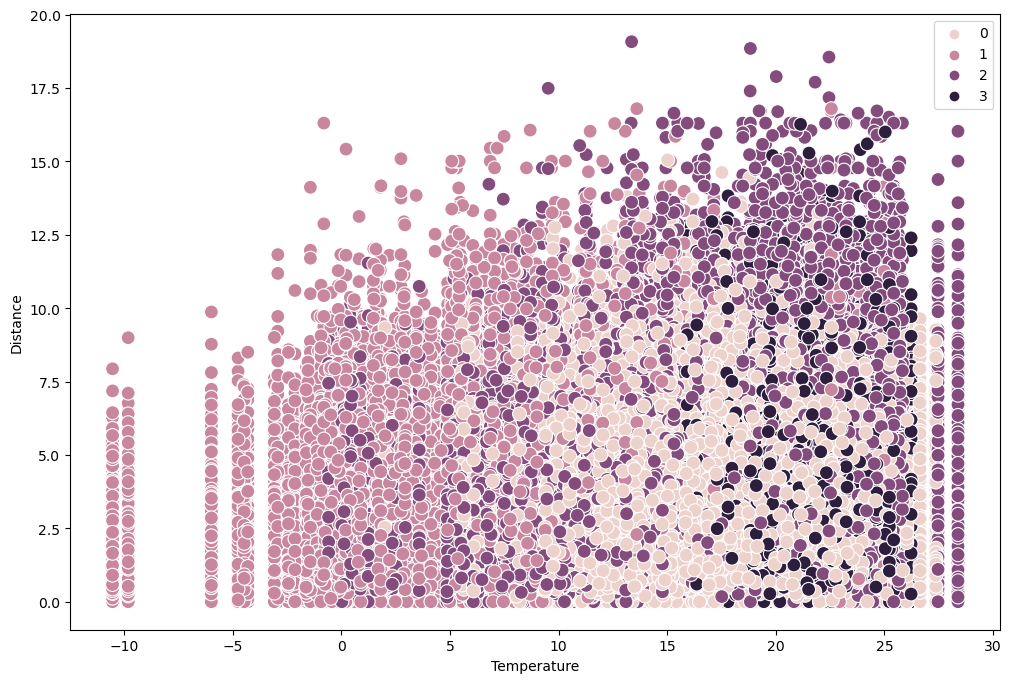

In [29]:
# Plot the clusters for the 'distance' and 't2m' variables.
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df['t2m'], y=df['distance'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Temperature')
plt.ylabel('Distance')

In [30]:
#Export
df.to_csv(os.path.join(path, 'Prepared Data', 'bixitrips_weather_clusters.csv'))